## **Problem Statement:**
Employee attrition has become a major challenge for organizations,which leads in increased recruitment and training costs, loss of experienced talent, disruption in team productivity and moral.

## **Objectives:**
- Understand the employee dataset
- Analyze categorical and numerical variables
- Visualize relationships (bar, pie, line plots)
- Use hypothesis testing (t-test, chi-square)
- Derive actionable insights


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Data

In [3]:
df = pd.read_csv('/Users/adityakumbhar/Developer/Datasets/HR_IBM.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## **Explorartory Data Analysis**

### Finding for missing values

In [6]:
df.isnull().values.any()

np.False_

In [28]:
df.shape

(1470, 35)

The data consists of total **1470 rows** and **35 columns**

In [36]:
df.duplicated().any()

np.False_

The data has no missing values and no duplicate values.

#### Taking only important features according to the problem statement

In [4]:
df_updated = df[['Age','Attrition','BusinessTravel','DistanceFromHome','RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance'	, 'YearsAtCompany', 'YearsInCurrentRole'	, 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
df_updated.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,8,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,2,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,2,4,6,3,3,2,2,2,2


In [29]:
print(f"(RelationshipSatisfaction) Min :{df_updated['RelationshipSatisfaction'].min()} , Max: {df_updated['RelationshipSatisfaction'].max()}")
print(f"(WorkLifeBalance) Min :{df_updated['WorkLifeBalance'].min()} , Max: {df_updated['WorkLifeBalance'].max()}")

(RelationshipSatisfaction) Min :1 , Max: 4
(WorkLifeBalance) Min :1 , Max: 4


The Relationship Satisfaction level of an employee can be mapped to numeric values from 1 to 4.  
The Work Life Balance of an employee can be mapped to numeric values from 1 to 4.  

where 1 is least and 4 is highest.

In [30]:

print(f"(DistanceFromHome) Min :{df_updated['DistanceFromHome'].min()} , Max: {df_updated['DistanceFromHome'].max()}")
print(f"(TotalWorkingYears) Min :{df_updated['TotalWorkingYears'].min()} , Max: {df_updated['TotalWorkingYears'].max()}")
print(f"(YearsAtCompany) Min :{df_updated['YearsAtCompany'].min()} , Max: {df_updated['YearsAtCompany'].max()}")

(DistanceFromHome) Min :1 , Max: 29
(TotalWorkingYears) Min :0 , Max: 40
(YearsAtCompany) Min :0 , Max: 40


The company has employees who come to the office from a distance of between 1 Km to 29 Km.  
 The company also has employees with 0 years of expeirence with max of 40 years of experience.

What is the average distance an employee lives from office?

In [31]:
float(df_updated['DistanceFromHome'].mean())

9.19251700680272

What is the average age of the employee?

In [32]:
int(df_updated['Age'].mean())

36

What is the average Relationship Satisfaction level?

In [33]:
int(df_updated['RelationshipSatisfaction'].mean())

2

What is the average tenure of people working at the company?

In [34]:
int(df_updated['YearsAtCompany'].mean())

7

What is total percentage of attrition?

In [35]:
df_updated['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Out of total 1470 employees the attrition has occured between 237 employees which is **around 17%**.

What is the average age of the employees who contributes in attrition?

In [39]:
int(df_updated[df_updated['Attrition'] == "Yes"]['Age'].mean())

33

What is the average tenure of working years before leaving?

In [40]:
int(df_updated[df_updated['Attrition'] == "Yes"]['YearsAtCompany'].mean())

5

What is the average total working tenure before leaving the company?

In [41]:
int(df_updated[df_updated['Attrition'] == "Yes"]['TotalWorkingYears'].mean())

8

What is the average level of work life balance before leaving the company?

In [42]:
int(df_updated[df_updated['Attrition'] == "Yes"]['WorkLifeBalance'].mean())

2

What is the average level of Relationship Satisfaction before leaving the company?

In [44]:
int(df_updated[df_updated['Attrition'] == "Yes"]['RelationshipSatisfaction'].mean())

2

What is the average distance employee travels who leave the company?

In [47]:
float(df_updated[df_updated['Attrition'] == "Yes"]['DistanceFromHome'].mean())

10.632911392405063

As there are various employees with different age groups so it is difficult to anlyze and get the insights from the data so creating age groups to better analyze and detect the trends if any.

The age groups are:  
18-30,   
30-40,  
40-50,  
50-60. 

In [ ]:
bins = [18, 29, 39, 49, 59 ]
labels = ['18-30', '30-40', '40-50', '50-60']

df_updated['Age Group'] = pd.cut(df_updated['Age'], bins=bins, labels=labels, right=False)
df_updated.head()

/var/folders/l1/kcfsdr451n98nd8gxcg2bzgw0000gn/T/ipykernel_91550/2573771337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


,Age,Attrition,BusinessTravel,DistanceFromHome,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age Group
0,41,Yes,Travel_Rarely,1,1,8,0,1,6,4,0,5,40-50
1,49,No,Travel_Frequently,8,4,10,3,3,10,7,1,7,50-60
2,37,Yes,Travel_Rarely,2,2,7,3,3,0,0,0,0,30-40
3,33,No,Travel_Frequently,3,3,8,3,3,8,7,3,0,30-40
4,27,No,Travel_Rarely,2,4,6,3,3,2,2,2,2,18-30


what is the distribution among the different age groups?

In [16]:
df_updated['Age Group'].value_counts().sort_index()

Age Group
18-30    258
30-40    648
40-50    367
50-60    182
Name: count, dtype: int64

As there are various employees who travel from various distances to the office this travel distance may contribute some in attrition in order to analyze that creating different groups for easy identification.

The distance groups are:  
1-10,   
10-20,  
20-30.

In [22]:
bins = [0,10, 19, 29]
labels = ['1-10', '10-20', '20-30']

df_updated['Distance Group'] = pd.cut(df_updated['DistanceFromHome'], bins=bins, labels=labels, right=False)
df_updated.head()

/var/folders/l1/kcfsdr451n98nd8gxcg2bzgw0000gn/T/ipykernel_91550/412734402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_updated['Distance Group'] = pd.cut(df_updated['DistanceFromHome'], bins=bins, labels=labels, right=False)


,Age,Attrition,BusinessTravel,DistanceFromHome,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age Group,Distance Group
0,41,Yes,Travel_Rarely,1,1,8,0,1,6,4,0,5,40-50,1-10
1,49,No,Travel_Frequently,8,4,10,3,3,10,7,1,7,50-60,1-10
2,37,Yes,Travel_Rarely,2,2,7,3,3,0,0,0,0,30-40,1-10
3,33,No,Travel_Frequently,3,3,8,3,3,8,7,3,0,30-40,1-10
4,27,No,Travel_Rarely,2,4,6,3,3,2,2,2,2,18-30,1-10


### **Data Visualization**

The Relationship Satisfaction Vs Attrition.

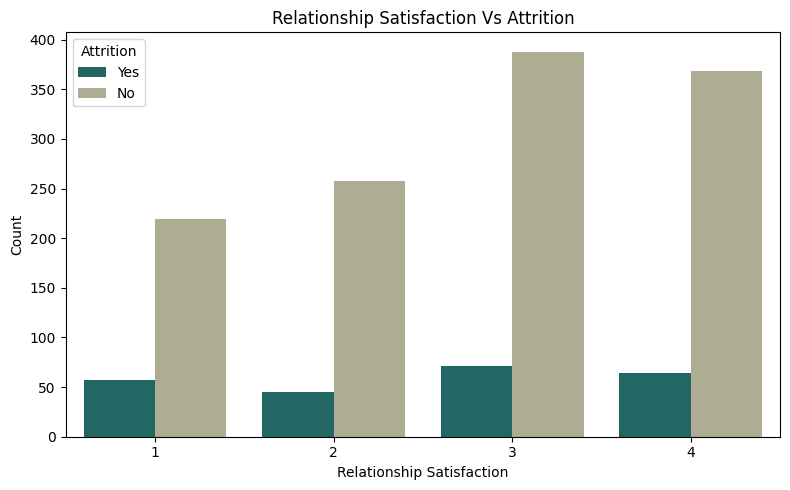

In [5]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_updated, x='RelationshipSatisfaction', hue='Attrition', palette={'Yes': '#17726d', 'No':'#b2b08f'})
plt.title("Relationship Satisfaction Vs Attrition")
plt.xlabel("Relationship Satisfaction")
plt.ylabel("Count")
plt.legend(title = "Attrition")
plt.tight_layout()

From the above graph we can conclude that the people with low relationship satisfaction level tend to leave jobs.  
And also the overall relationship satisfaction level of employees in the company is good as most of the employee have level 3 of the relationship satisfaction.

Work Life Balance Vs Attrition.

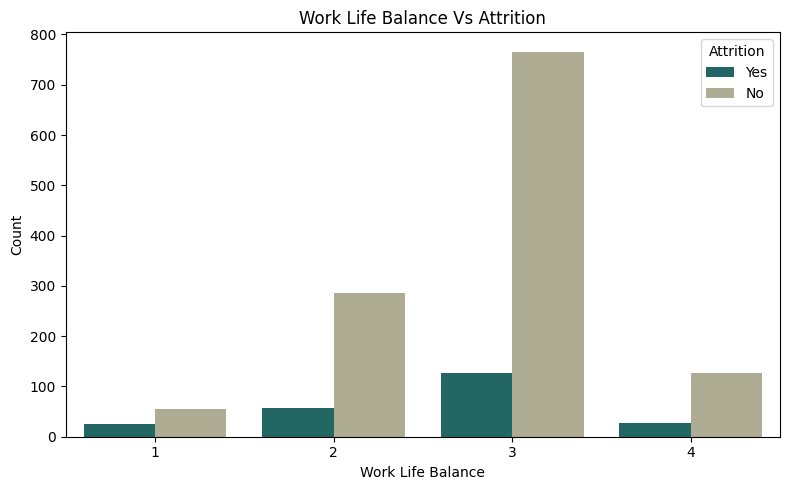

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_updated, x='WorkLifeBalance', hue='Attrition', palette={'Yes': '#17726d', 'No':'#b2b08f'})
plt.title("Work Life Balance Vs Attrition")
plt.xlabel("Work Life Balance")
plt.ylabel("Count")
plt.legend(title = "Attrition")
plt.tight_layout()

The work life balance plays an important role in employee attrition as the lower level of work life balance might lead into higher attrition as we can see in the graph.

Distance from home Vs Attrition

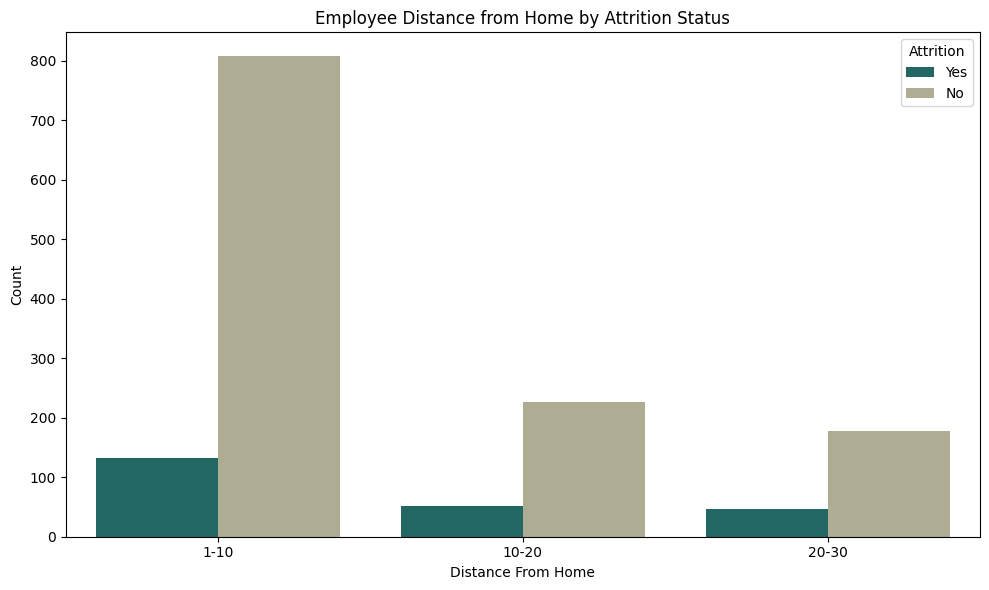

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_updated, x='Distance Group', hue='Attrition',palette={'Yes': '#17726d', 'No':'#b2b08f'})
plt.title('Employee Distance from Home by Attrition Status')
plt.xlabel('Distance From Home')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

Attrition status by years at the company

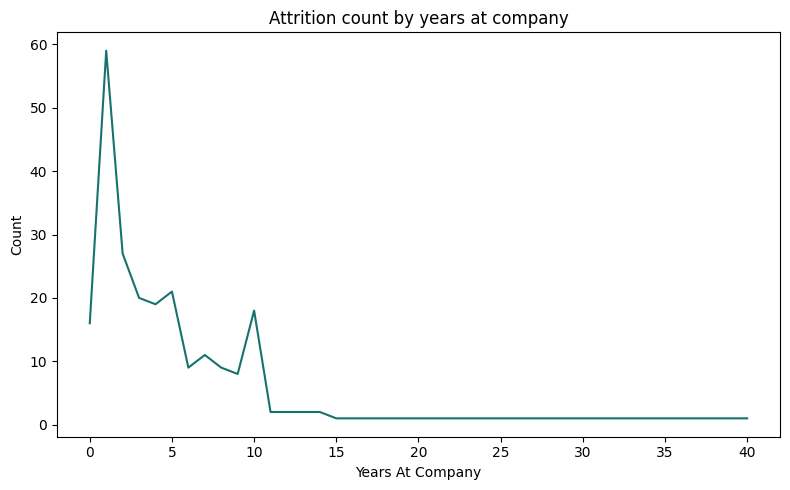

In [13]:
attrition = df[df_updated['Attrition'] == "Yes"]
age_attrition_count = attrition['YearsAtCompany'].value_counts().sort_index()


plt.figure(figsize=(8, 5))
sns.lineplot(x=age_attrition_count.index, y=age_attrition_count.values, markers='o',color = '#17726d')
plt.title("Attrition count by years at company")
plt.xlabel("Years At Company")
plt.ylabel("Count")
plt.tight_layout()

From the above graph we can clearly see that the employees who are there for more than 10 years are tend to stay than the fresh joiners.  
After 10 years at the company the employees stay.

Age Group Distribution among the employees who left

/var/folders/l1/kcfsdr451n98nd8gxcg2bzgw0000gn/T/ipykernel_91550/4078471064.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_attrition = df_updated.groupby(['Attrition', 'Age Group']).size().loc['Yes']


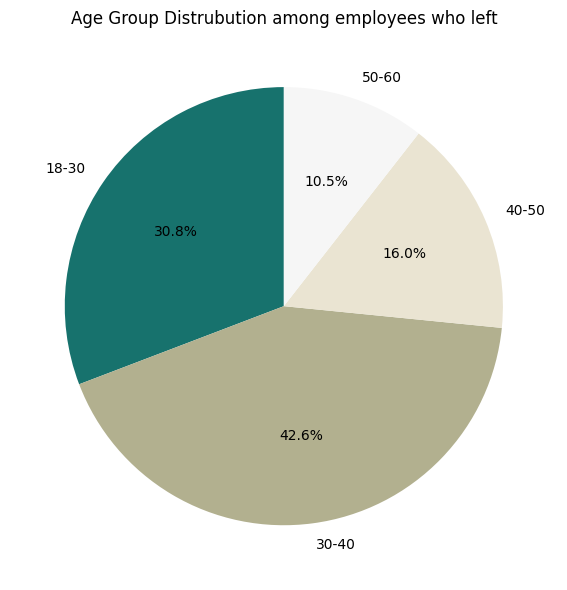

In [11]:
age_group_attrition = df_updated.groupby(['Attrition', 'Age Group']).size().loc['Yes']
colors = ['#17726d', '#b2b08f', '#eae4d2', '#f6f6f6']
plt.figure(figsize=(6, 6))
plt.pie(age_group_attrition, labels=age_group_attrition.index, autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Age Group Distrubution among employees who left")
plt.tight_layout()

The majority of emplyees who left are from the age group 30-40 which comes under freshers and mid level experienced employees.  
The older the employee tend to stay.

### **Hypothesis Testing**

Distance from Home

**Null Hypothesis:** The distance doesn't affects the attrition.  
**Alternate Hypothesis:** The distance affects the attrition.

In [57]:
from scipy.stats import ttest_ind

left = df_updated[df_updated['Attrition'] == "Yes"]['DistanceFromHome']
stayed  = df_updated[df_updated['Attrition'] == "No"]['DistanceFromHome']

t_stat, p_value = ttest_ind(left, stayed, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: 2.8882
P-Value: 0.0041


As the p-value is less that 0.05, we reject the null hypothesis suggesting that the distance from home of the employee affects the employee attrition.

Age  
**Null Hypothesis:** The age of the employee doesn't affect the employee attrition.  
**Alternate Hypothesis:** The age of the employee affects the employee attrition.

In [58]:
from scipy.stats import ttest_ind

left = df_updated[df_updated['Attrition'] == "Yes"]['Age']
stayed  = df_updated[df_updated['Attrition'] == "No"]['Age']

t_stat, p_value = ttest_ind(left, stayed, equal_var=False)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

T-Statistic: -5.8280
P-Value: 0.0000


As the p-value is less that 0.05, we reject the null hypothesis suggesting that the age of the employee affects the employee attrition.

Relationship satisfaction  
**Null Hypothesis:** Relationship satisfaction is independent of attrition.  
**Alternate Hypothesis:** Relationship satisfaction is associated with attrition.

In [59]:
from scipy.stats import chi2_contingency

contigency_table = pd.crosstab(df_updated['RelationshipSatisfaction'], df_updated['Attrition'])

chi2_stat, p, dof, expected = chi2_contingency(contigency_table)
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 5.2411
P-value: 0.1550
Degrees of Freedom: 3


As the p-value is greater that 0.05, we fail to reject the null hypothesis suggesting that the relationship satisfaction level of the employee is independent of the employee attrition.

Work Life Balance    
**Null Hypothesis:** Work Life Balance is independent of attrition.  
**Alternate Hypothesis:** Work Life Balance is associated with attrition.

In [60]:
from scipy.stats import chi2_contingency

contigency_table = pd.crosstab(df_updated['WorkLifeBalance'], df_updated['Attrition'])

chi2_stat, p, dof, expected = chi2_contingency(contigency_table)
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 16.3251
P-value: 0.0010
Degrees of Freedom: 3


As the p-value is less that 0.05, we reject the null hypothesis suggesting that the work life balance is associated with employee attrition.